# Analyze Image Structure Function with a Brownian model

**TO DO** Add further brief explanatory text that explains what happens.

In [1]:
#%% Insert path to import
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ddm_toolkit
from ddm_toolkit.ddm import ImageStructureFunction
from ddm_toolkit.analysis import ISFanalysis_simple_brownian

Running inside a Notebook (Jupyter or otherwise)...


The input data is the previously (`simulNB2` Notebook) calculated Image Structure Function that we load from disk.

In [4]:
ISF_fpn = '../datafiles/simulNB_ISF.npz'

In [5]:
ISF = ImageStructureFunction.fromFile(ISF_fpn)

We must supply an initial guess for the diffusion coefficient to get the fitting algorithm started.

Let's take 1.0 µm$^2$ s$^{-1}$.

This initial guess is actually the only information that the algorithm needs (together of course with the input ISF).

In [6]:
initial_guess_D = 1.0

The model fitting algorithm is invoked by simply calling one function that will do all the work.

In [7]:
result = ISFanalysis_simple_brownian(ISF, initial_guess_D)

`result` contains all numbers describing the fit results.

It carries also methods to print and plot these results in a clear way.

In particular, it gives the `result.D_fit`, displayed as "D (fit)".

Is it close to the value you expected on basis of the simulation parameters used in Notebook `simulNB1....ipynb` ??


In [8]:
result.print_report()

D_guess (user): 1.0 µm2/s
D_guess (refined): 0.37485109480722417 µm2/s
q_low:  0.24374425760610463 µm-1
q_opt:  0.4604058199226421 µm-1
q_high: 0.6770673822391796 µm-1
q_max:  3.439502301775032 µm-1
D (fit): 0.38815878945828647 µm2/s (+/-  0.007939597482392906 , 95% CI)


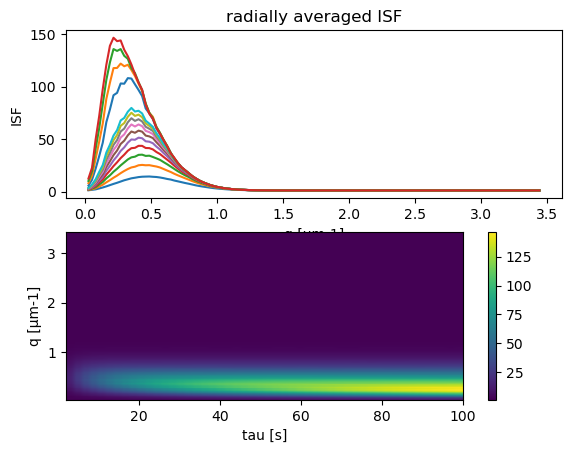

In [9]:
result.show_ISF_radavg()

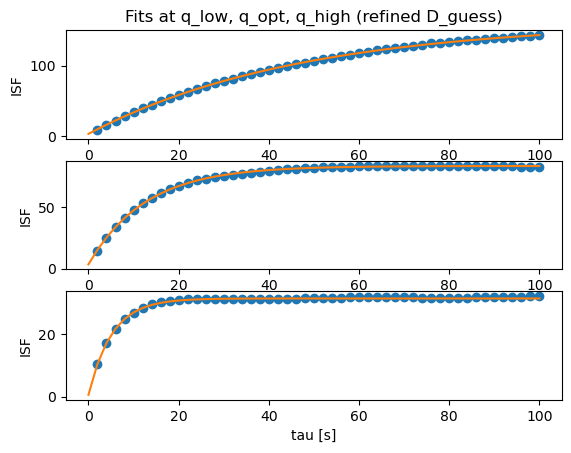

In [10]:
result.show_fits()

Remember that the radially-averaged $\textrm{ISF}(q, \tau)$ in purely Brownian DDM decomposes as

$\textrm{ISF}(q, \tau) = A(q)[1-f(q,\tau)] + B(q)$

with

$f(q,\tau) = \exp(-k(q)\tau)$

The algorithm makes such exponential fits to the ISF over a range of $q$, obtaining $A$, $B$ and $k$ as a function of $q$



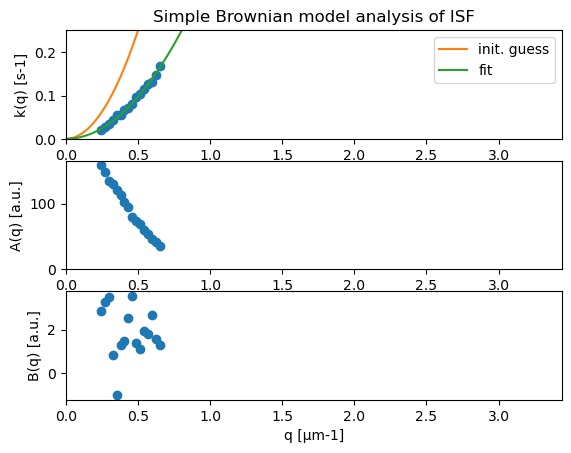

In [11]:
result.show_Aq_Bq_kq()

The diffusion coefficient $D$ is obtained by fitting $k(q) = Dq^2$. (The green line called 'fit', in the above figure).

In [12]:
print(result.D_fit)

0.38815878945828647
